# **Метод главных компонент**
### Царитова Нина
*НПМбд-01-19*

In [7]:
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

## **I. Датасет**
Cкачаем  базу  данных  digits  при  помощи  функции load_digits из  пакета sklearn.datasets. Получим массивы картинок в виде массива X, а также ответов labels. Нарисуем  несколько  примеров картинок.  

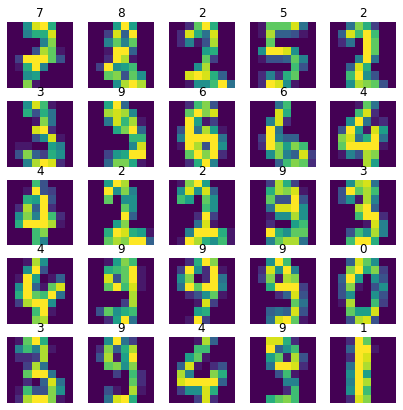

In [8]:
digits = load_digits()
X = digits['data']
y = digits['target']
fig, axs = plt.subplots(5, 5, figsize=(7, 7))
for i in range(5):
    for j in range(5):
        k = np.random.randint(0, 1797)
        axs[i, j].imshow(X[k,:].reshape(8, 8))#, cmap='gray')
        axs[i, j].set_title(y[k])
        axs[i, j].axis('off')

## **II. Алгоритм PCA**
Внутри метода fit():  
- Центрирование данных
- Вычисление матрицы ковариации
- Вычисление собственных векторов F и значений eig_values матрицы ковариации C.

Внутри метода transform():
- Преобразование данных в координаты в базисе главных компонент

In [42]:
class PCA():
  
    def __init__(self, n_components=None):
        # n_components - количество компонент, которые оставляем
        self.n_components = n_components

    def fit(self, X):
        X -= X.mean(axis=0) #Центрирование данных
        C = X.T.dot(X) # Матрица ковариации
        eig_values, F = np.linalg.eigh(C)
        eig_values = eig_values[::-1]
        F = F[:, ::-1]
        #U, s, Vh = np.linalg.svd(X, full_matrices=False)
        #V = Vh.T
        return X, F, eig_values

    def transform(self, X, F):
        Y = X.dot(F)
        return Y

    def fit_transform(self, X): 
        X_c, F, _ = self.fit(X)
        Y = self.transform(X_c, F)
        if self.n_components != None:
            Y = Y[:, :(self.n_components)]
        return Y

График собственных значений матрицы ковариации:


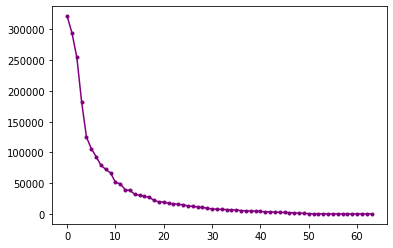

In [43]:
test = PCA(2) 
a, b,  eig_values  = test.fit(X)
plt.plot(eig_values, marker = '.', linestyle = '-', color = 'purple')

График отношения кумулятивной суммы собственных значений матрицы ковариации к их полной сумме:

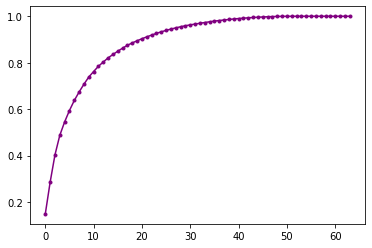

In [44]:
a = np.cumsum(eig_values) / np.sum(eig_values)
plt.plot(a, marker = '.', linestyle = '-', color = 'purple')

Изобразим на графике точки нашего датасета, оставив только 2 главные координаты. Можем увидеть отдельные кластеры, окрашенные в цвета, соответствующие определённой цифре

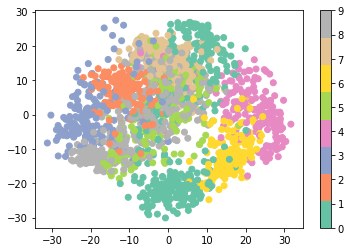

In [45]:
X_ = test.fit_transform(X)
plt.scatter(X_[:, 0], X_[:, 1], c=y, cmap='Set2')
plt.colorbar()

## **III. Алгоритм kNN**
В методе init():
- сохраняется число соседей, по умолчанию их 5.

В методе fit():
- сохряняются обучающие данные.

В методе predict():
- вычисление возможного класса, к которому принадлежит тестируемый объект. Для этого необходимо вычислить расстояние от тестируемой точки до точек в обучающей базе. Далее находим k ближайших точек и смотрим, к какому классу они принадлежат. Класс, к которому принадлежит большее число соседей, и будет классом, к которому вероятнее всего принадлежит искомая точка.

In [64]:
class my_kNN(): 
    def __init__(self, n_neighbors=5): 
      #n_neighbors - количество соседей
        self.n_neighbors = n_neighbors  
        
    def fit(self, X_train, y_train):
      #Сохраняет переданные обучающие данные во внутренние переменные
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X): 
        classes = list()
        for point in X:
            norms = list() #для каждого объекта будет храниться набор расстояний до обучающих объектов
            
            for point_train in self.X_train:
                # ищем расстояние 
                norm = np.linalg.norm(np.array(point) - np.array(point_train)) 
                norms.append(norm)
                
            norms_sort = np.argsort(norms) # получаем индексы 
            minimum_norms = norms_sort[:self.n_neighbors] # выбраем первые k индексов 
            object_class = list()
            
            # сопоставляем индексы с классами объектов
            for j in minimum_norms:
                object_class.append(self.y_train[j])
                
            # находим класс, который встречается чаще всего
            object_class_set = set(object_class)
            our_class = None 
            c_our_class = 0
            for k in object_class_set:
                c = object_class.count(k)
                if c > c_our_class:
                    c_our_class = c 
                    our_class = k 
            classes.append(our_class)
        return classes

Разбили данные X и labels на обучающую и тестовую выборку, используя функцию train_test_split из модуля sklearn.model_selection. Посчитали точность на тестовой выборке, используя функцию accuracy_score из модуля sklearn.metrics для компонент от 1 до 64 и соседей от 1 до 30.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

for i in range (1, 30, 5):
    kNN = my_kNN(i)
    kNN.fit(X_train, y_train)
    classes = kNN.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("Точность при k =", i, ":", accuracy)

Точность при k = 1 : 98.48484848484848
Точность при k = 6 : 99.15824915824916
Точность при k = 11 : 97.81144781144782
Точность при k = 16 : 97.81144781144782
Точность при k = 21 : 96.63299663299664
Точность при k = 26 : 96.29629629629629


In [67]:
test = PCA(1)
Y = test.fit_transform(X)
print ("Количество компонент = 1")
X_train, X_test, y_train, y_test = train_test_split(Y, y, test_size = 0.33, random_state = 42)
for i in range (1, 30, 5):
    kNN = my_kNN(i)
    kNN.fit(X_train, y_train)
    classes = kNN.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("Точность при k =", i, ":", accuracy)

Количество компонент = 1
Точность при k = 1 : 26.936026936026934
Точность при k = 6 : 32.323232323232325
Точность при k = 11 : 34.34343434343434
Точность при k = 16 : 36.53198653198653
Точность при k = 21 : 37.03703703703704
Точность при k = 26 : 36.36363636363637


In [71]:
test = PCA(32)
Y = test.fit_transform(X)
print ("Количество компонент = 32")
X_train, X_test, y_train, y_test = train_test_split(Y, y, test_size = 0.33, random_state = 42)
for i in range (1, 30, 5):
    kNN = my_kNN(i)
    kNN.fit(X_train, y_train)
    classes = kNN.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("Точность при k =", i, ":", accuracy)

Количество компонент = 32
Точность при k = 1 : 98.65319865319864
Точность при k = 6 : 99.15824915824916
Точность при k = 11 : 97.97979797979798
Точность при k = 16 : 97.47474747474747
Точность при k = 21 : 97.13804713804713
Точность при k = 26 : 96.46464646464646


In [72]:
test = PCA(64)
Y = test.fit_transform(X)
print ("Количество компонент = 64")
X_train, X_test, y_train, y_test = train_test_split(Y, y, test_size = 0.33, random_state = 42)
for i in range (1, 30, 5):
    kNN = my_kNN(i)
    kNN.fit(X_train, y_train)
    classes = kNN.predict(X_test)
    accuracy = accuracy_score(y_test, classes) * 100
    print("Точность при k =", i, ":", accuracy)

Количество компонент = 64
Точность при k = 1 : 98.48484848484848
Точность при k = 6 : 99.15824915824916
Точность при k = 11 : 97.81144781144782
Точность при k = 16 : 97.81144781144782
Точность при k = 21 : 96.63299663299664
Точность при k = 26 : 96.29629629629629
